In [1]:
from random import randrange

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score
from sklearn import linear_model

from dbn.tensorflow import UnsupervisedDBN, SupervisedDBNClassification

In [2]:
train_df = pd.read_csv('datasets/mnist_train.csv')
test_df  = pd.read_csv('datasets/mnist_test.csv')

In [3]:
X_train, X_test = (train_df.iloc[:,1:785] / 255).astype(np.float32).to_numpy(), (test_df.iloc[:,1:785] / 255).astype(np.float32).to_numpy()
Y_train, Y_test = train_df.iloc[:,0].to_numpy(), test_df.iloc[:,0].to_numpy()

In [4]:
unsupervised_dbn = UnsupervisedDBN(
    hidden_layers_structure=[300, 100],
    batch_size=512,
    learning_rate_rbm=0.002,
    n_epochs_rbm=20,
    activation_function='relu',
    verbose=False
)

unsupervised_dbn.fit(X_train)

36408


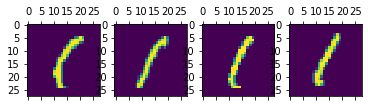

In [5]:
X_transformed = unsupervised_dbn.transform(X_train)

random_index = randrange(len(X_transformed))
random_features = X_transformed[random_index]

indexes = np.argsort([np.linalg.norm(random_features - features) for features in np.vstack((X_transformed[:random_index], X_transformed[random_index+1:]))])

print(random_index)

fig, axs = plt.subplots(1, 4)

axs[0].matshow(X_train.reshape(-1, 28, 28)[random_index])

for i in range(3):
    axs[i+1].matshow(X_train.reshape(-1, 28, 28)[indexes[i]])

plt.show() 

In [6]:
dbn_classifier = linear_model.LogisticRegression()
dbn_classifier.fit(X_transformed, Y_train)

logistic_classifier = linear_model.LogisticRegression()
logistic_classifier.fit(X_train, Y_train)

In [7]:
print(f'Logistic regression using DBN features: {accuracy_score(Y_test, dbn_classifier.predict(unsupervised_dbn.transform(X_test)))}')
print(f'Logistic regression using raw pixel features: {accuracy_score(Y_test, logistic_classifier.predict(X_test))}')

Logistic regression using DBN features: 0.9409
Logistic regression using raw pixel features: 0.9186


In [8]:
no_pre_train_classifier = SupervisedDBNClassification(
    hidden_layers_structure=[300, 100],
    learning_rate_rbm=0.002,
    learning_rate=0.1,
    n_epochs_rbm=0,
    n_iter_backprop=100,
    batch_size=512,
    activation_function='relu',
    dropout_p=0.2,
    verbose=False
)

pre_train_classifier = SupervisedDBNClassification(
    hidden_layers_structure=[300, 100],
    learning_rate_rbm=0.002,
    learning_rate=0.1,
    n_epochs_rbm=10,
    n_iter_backprop=100,
    batch_size=512,
    activation_function='relu',
    dropout_p=0.2,
    verbose=False
)


no_pre_train_classifier.fit(X_train, Y_train)
pre_train_classifier.fit(X_train, Y_train)

In [9]:
print(f'No pre-train accuracy: {accuracy_score(Y_test, no_pre_train_classifier.predict(X_test))}')
print(f'With pre-train accuracy: {accuracy_score(Y_test, pre_train_classifier.predict(X_test))}')

No pre-train accuracy: 0.9831
With pre-train accuracy: 0.9925
